In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../Network_Data/NetworkData.csv")
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
df.shape

(11055, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [39]:
keys = df.columns.to_list()
values  = list(map(str, df.dtypes.to_dict().values()))
lst = [f'- {keys[i]} : {values[i]}' for i in range(len(keys))]
lst

['- having_IP_Address : int64',
 '- URL_Length : int64',
 '- Shortining_Service : int64',
 '- having_At_Symbol : int64',
 '- double_slash_redirecting : int64',
 '- Prefix_Suffix : int64',
 '- having_Sub_Domain : int64',
 '- SSLfinal_State : int64',
 '- Domain_registeration_length : int64',
 '- Favicon : int64',
 '- port : int64',
 '- HTTPS_token : int64',
 '- Request_URL : int64',
 '- URL_of_Anchor : int64',
 '- Links_in_tags : int64',
 '- SFH : int64',
 '- Submitting_to_email : int64',
 '- Abnormal_URL : int64',
 '- Redirect : int64',
 '- on_mouseover : int64',
 '- RightClick : int64',
 '- popUpWidnow : int64',
 '- Iframe : int64',
 '- age_of_domain : int64',
 '- DNSRecord : int64',
 '- web_traffic : int64',
 '- Page_Rank : int64',
 '- Google_Index : int64',
 '- Links_pointing_to_page : int64',
 '- Statistical_report : int64',
 '- Result : int64']

In [41]:
col = df.columns.to_list()
updated_col = [f'- {i}' for i in col]
updated_col

['- having_IP_Address',
 '- URL_Length',
 '- Shortining_Service',
 '- having_At_Symbol',
 '- double_slash_redirecting',
 '- Prefix_Suffix',
 '- having_Sub_Domain',
 '- SSLfinal_State',
 '- Domain_registeration_length',
 '- Favicon',
 '- port',
 '- HTTPS_token',
 '- Request_URL',
 '- URL_of_Anchor',
 '- Links_in_tags',
 '- SFH',
 '- Submitting_to_email',
 '- Abnormal_URL',
 '- Redirect',
 '- on_mouseover',
 '- RightClick',
 '- popUpWidnow',
 '- Iframe',
 '- age_of_domain',
 '- DNSRecord',
 '- web_traffic',
 '- Page_Rank',
 '- Google_Index',
 '- Links_pointing_to_page',
 '- Statistical_report',
 '- Result']

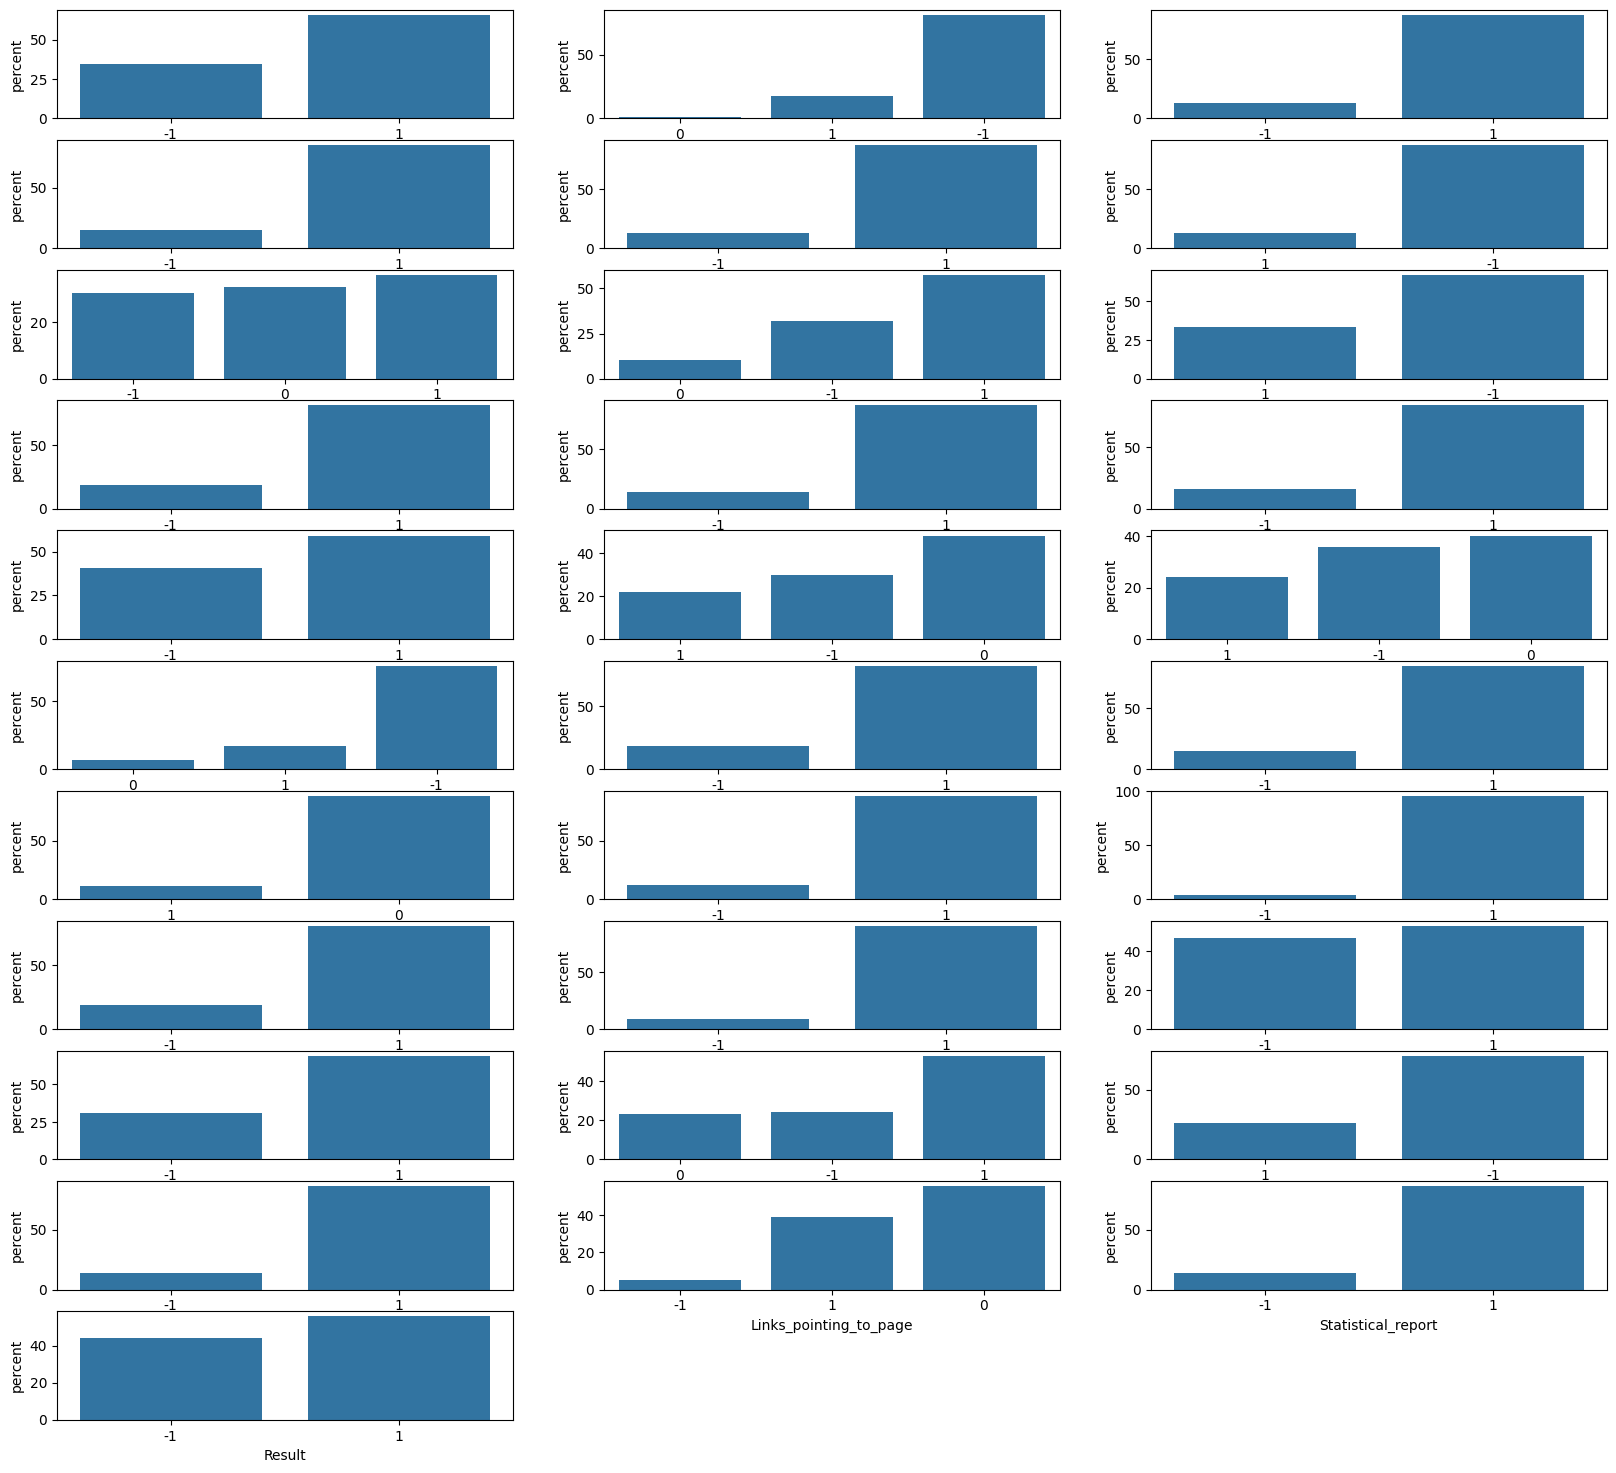

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20), facecolor='white')
plotnumber = 1

for i in df:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(x = df[i], stat='percent', order=df[i].value_counts().sort_values().index.to_list())
    plt.xlabel(i)
    plotnumber +=1
 
    

In [38]:
df['Links_pointing_to_page'].value_counts().sort_values().index.to_list()

[-1, 1, 0]

In [122]:
corr_matrix = df.corr()
target_corr = corr_matrix['Result'].sort_values(ascending=False)
print(corr_matrix[(corr_matrix['Result']>0.6)].index.to_list())
print(corr_matrix[(corr_matrix['Result']<0.01) & (corr_matrix['Result']>-0.01)].index.to_list())
    

['SSLfinal_State', 'URL_of_Anchor', 'Result']
['Favicon', 'popUpWidnow', 'Iframe']


In [141]:
target_corr

Result                         1.000000
SSLfinal_State                 0.714741
URL_of_Anchor                  0.692935
Prefix_Suffix                  0.348606
web_traffic                    0.346103
having_Sub_Domain              0.298323
Request_URL                    0.253372
Links_in_tags                  0.248229
SFH                            0.221419
Google_Index                   0.128950
age_of_domain                  0.121496
Page_Rank                      0.104645
having_IP_Address              0.094160
Statistical_report             0.079857
DNSRecord                      0.075718
URL_Length                     0.057430
having_At_Symbol               0.052948
on_mouseover                   0.041838
port                           0.036419
Links_pointing_to_page         0.032574
Submitting_to_email            0.018249
RightClick                     0.012653
popUpWidnow                    0.000086
Favicon                       -0.000280
Iframe                        -0.003394


In [120]:
corr_pair=corr_matrix[(corr_matrix>0.7) | (corr_matrix<-0.7)].stack().reset_index()

In [104]:
high_corr_pair = corr_matrix.where((corr_matrix>0.7) | (corr_matrix<-0.7)).stack().reset_index()
high_corr_pair.columns = ['Feature1','Feature2','Correlation']
high_corr_pair = high_corr_pair[high_corr_pair['Feature1'] != high_corr_pair['Feature2']]

In [138]:
feature_1 = set(high_corr_pair.Feature1.to_list())
feature_2=set(high_corr_pair.Feature2.to_list())
feature_1.discard('Result')
feature_2.discard('Result')
feature_1

{'Abnormal_URL',
 'Favicon',
 'HTTPS_token',
 'SSLfinal_State',
 'Shortining_Service',
 'Submitting_to_email',
 'double_slash_redirecting',
 'on_mouseover',
 'popUpWidnow',
 'port'}

In [139]:
feature_2

{'Abnormal_URL',
 'Favicon',
 'HTTPS_token',
 'SSLfinal_State',
 'Shortining_Service',
 'Submitting_to_email',
 'double_slash_redirecting',
 'on_mouseover',
 'popUpWidnow',
 'port'}

In [140]:
high_corr_pair

,Feature1,Feature2,Correlation
3,Shortining_Service,double_slash_redirecting,0.842796
4,Shortining_Service,HTTPS_token,0.757838
5,Shortining_Service,Abnormal_URL,0.739290
7,double_slash_redirecting,Shortining_Service,0.842796
9,double_slash_redirecting,HTTPS_token,0.760799
10,double_slash_redirecting,Abnormal_URL,0.723724
14,SSLfinal_State,Result,0.714741
17,Favicon,port,0.803834
18,Favicon,on_mouseover,0.706179
19,Favicon,popUpWidnow,0.939633


In [119]:
high_corr_pair.sort_values(by='Correlation', ascending=False, ignore_index=True)

,Feature1,Feature2,Correlation
0,Favicon,popUpWidnow,0.939633
1,popUpWidnow,Favicon,0.939633
2,double_slash_redirecting,Shortining_Service,0.842796
3,Shortining_Service,double_slash_redirecting,0.842796
4,port,Favicon,0.803834
5,Favicon,port,0.803834
6,port,Submitting_to_email,0.799088
7,Submitting_to_email,port,0.799088
8,double_slash_redirecting,HTTPS_token,0.760799
9,HTTPS_token,double_slash_redirecting,0.760799
